# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [123]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [124]:
# Loading dataset
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
address_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')
demographic_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')


In [125]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [126]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [127]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [128]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [129]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [130]:
address_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [131]:
address_df.columns = address_df.iloc[0]
address_df

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [132]:
address_df.drop(index=address_df.index[0], axis=0, inplace=True)
address_df

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [133]:
demographic_df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2858,Benedicto Radki,Male,4,2002-01-09 00:00:00,18.0,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
3996,3173,Angelo,Male,55,2001-10-10 00:00:00,18.0,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0
3997,3435,Stevena Allcock,Female,80,2002-01-15 00:00:00,18.0,Senior Editor,NaN,Affluent Customer,N,No,1.0
3998,3949,Costa Sleightholm,Male,24,2001-12-19 00:00:00,18.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


In [134]:
demographic_df.drop(index=demographic_df.index[0], axis=0, inplace=True)
demographic_df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN
5,451,Marlow Flowerdew,U,37,NaN,120.0,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2858,Benedicto Radki,Male,4,2002-01-09 00:00:00,18.0,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
3996,3173,Angelo,Male,55,2001-10-10 00:00:00,18.0,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0
3997,3435,Stevena Allcock,Female,80,2002-01-15 00:00:00,18.0,Senior Editor,NaN,Affluent Customer,N,No,1.0
3998,3949,Costa Sleightholm,Male,24,2001-12-19 00:00:00,18.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


# EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

## Data Cleaning - Checking and working with missing value

In [135]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


### numerical variables

In [136]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean(numeric_only=True))
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542
1542


###Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

In [189]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [188]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [139]:
# cleaning Customer Address
# Nemerical Value
# Inspect missing values in the dataset
print(address_df.isnull().values.sum())
# Replace the ' 's with NaN
address_df = address_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
address_df = address_df.fillna(address_df.mean(numeric_only=True))
# Count the number of NaNs in the dataset to verify
print(address_df.isnull().values.sum())

0
0


In [187]:
print(address_df.info())
for col in address_df.columns:
    # Check if the column is of object type
    if address_df[col].dtypes == 'object':
        # Impute with the most frequent value
        address_df[col] = address_df[col].fillna(address_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(address_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None
0


In [186]:
# cleaning Customer demographic
# Nemerical Value
# Inspect missing values in the dataset
print(demographic_df.isnull().values.sum())
# Replace the ' 's with NaN
demographic_df = demographic_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
demographic_df = demographic_df.fillna(demographic_df.mean(numeric_only=True))
# Count the number of NaNs in the dataset to verify
print(demographic_df.isnull().values.sum())

0
0


In [185]:
print(demographic_df.info())
for col in demographic_df.columns:
    # Check if the column is of object type
    if demographic_df[col].dtypes == 'object':
        # Impute with the most frequent value
        demographic_df[col] = demographic_df[col].fillna(demographic_df[col].value_counts().index[0])
        if col == 'gender':
            demographic_df[col] = demographic_df[col].replace('U', demographic_df[col].value_counts().index[0])

demographic_df['age'] = demographic_df['age'].replace(120.0, demographic_df['age'].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(demographic_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   name                                 3999 non-null   object        
 2   gender                               3999 non-null   object        
 3   past_3_years_bike_related_purchases  3999 non-null   int64         
 4   DOB                                  3999 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3999 non-null   object        
 7   job_industry_category                3999 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  owns_car    

In [143]:
demographic_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,144,Jory Barrabeale,Female,71,1978-01-30,42.0,Environmental Tech,IT,Mass Customer,N,No,10.654652
2,168,Reggie Broggetti,Female,8,1978-01-30,42.0,General Manager,IT,Affluent Customer,N,Yes,10.654652
3,267,Edgar Buckler,Female,53,1978-01-30,42.0,Business Systems Development Analyst,IT,High Net Worth,N,No,10.654652
4,290,Giorgio Kevane,Female,42,1978-01-30,42.0,Senior Sales Associate,IT,Mass Customer,N,No,10.654652
5,451,Marlow Flowerdew,Female,37,1978-01-30,42.0,Quality Control Specialist,IT,High Net Worth,N,No,10.654652


# Merge 3 Table

In [144]:
# join transaction and demographic
mergetable = transaction_df.merge(demographic_df, how="inner", left_on = 'customer_id', right_on = 'customer_id').sort_values('customer_id')
mergetable

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
606,14931,31,1,2017-12-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
609,18970,11,1,2017-03-29,True,Approved,Giant Bicycles,Standard,high,medium,...,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
608,16423,9,1,2017-12-09,True,Approved,OHM Cycles,Road,medium,medium,...,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
607,15663,32,1,2017-06-04,True,Approved,Giant Bicycles,Standard,medium,medium,...,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
605,14486,23,1,2017-03-27,False,Approved,Norco Bicycles,Mountain,low,small,...,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,...,Female,71,1967-07-21,52.0,Business Systems Development Analyst,Entertainment,Affluent Customer,N,No,17.0
11298,19836,40,3500,2017-03-14,True,Approved,OHM Cycles,Standard,high,medium,...,Female,71,1967-07-21,52.0,Business Systems Development Analyst,Entertainment,Affluent Customer,N,No,17.0
11294,6309,69,3500,2017-01-09,True,Approved,Giant Bicycles,Road,medium,medium,...,Female,71,1967-07-21,52.0,Business Systems Development Analyst,Entertainment,Affluent Customer,N,No,17.0
11293,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,medium,medium,...,Female,71,1967-07-21,52.0,Business Systems Development Analyst,Entertainment,Affluent Customer,N,No,17.0


In [145]:
mergetable = mergetable.merge(address_df, how="inner", left_on = 'customer_id', right_on = 'customer_id').sort_values('customer_id')
mergetable

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,14931,31,1,2017-12-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
10,13424,2,1,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
8,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
7,3765,38,1,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
6,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,19836,40,3500,2017-03-14,True,Approved,OHM Cycles,Standard,high,medium,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19957,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,medium,medium,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19953,8562,33,3500,2017-08-08,False,Approved,Giant Bicycles,Standard,medium,small,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19954,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10


# EDA - dist - strip - rel - heatmap

age count

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'count')

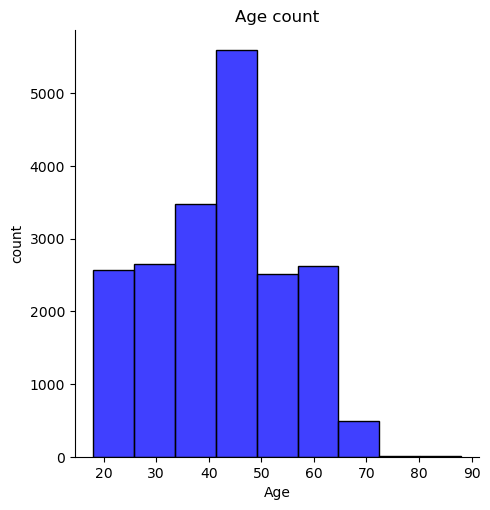

In [146]:
sns.displot(mergetable['age'], kde=False, bins=9, color='blue', edgecolor='black')
plt.title('Age count')
plt.xlabel('Age')
plt.ylabel('count')

 bike brand count 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Giant Bicycles'),
  Text(1, 0, 'Solex'),
  Text(2, 0, 'Trek Bicycles'),
  Text(3, 0, 'OHM Cycles'),
  Text(4, 0, 'Norco Bicycles'),
  Text(5, 0, 'WeareA2B')])

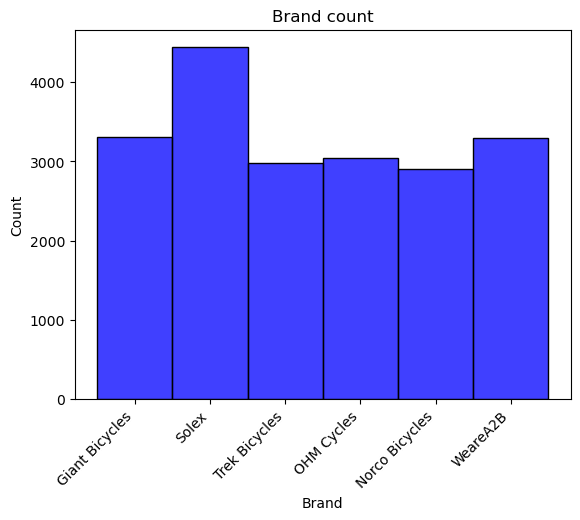

In [147]:
sns.histplot(mergetable['brand'], kde=False, color='blue', edgecolor='black')

plt.title('Brand count')
plt.xlabel('Brand')
plt.ylabel('Count')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')


性别和product size

<Axes: xlabel='product_size', ylabel='count'>

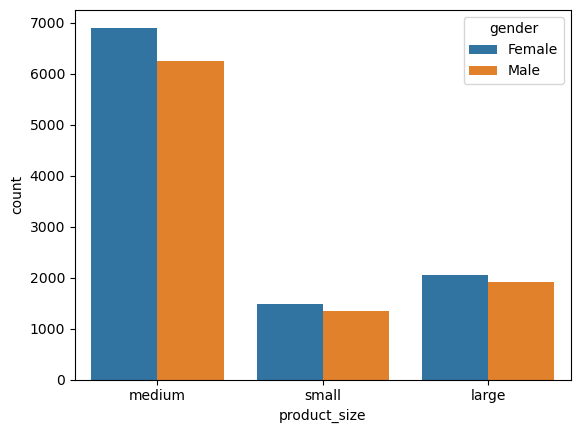

In [148]:
sns.countplot(x='product_size', hue='gender', data=mergetable)


wealth和brand

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Giant Bicycles'),
  Text(1, 0, 'Solex'),
  Text(2, 0, 'Trek Bicycles'),
  Text(3, 0, 'OHM Cycles'),
  Text(4, 0, 'Norco Bicycles'),
  Text(5, 0, 'WeareA2B')])

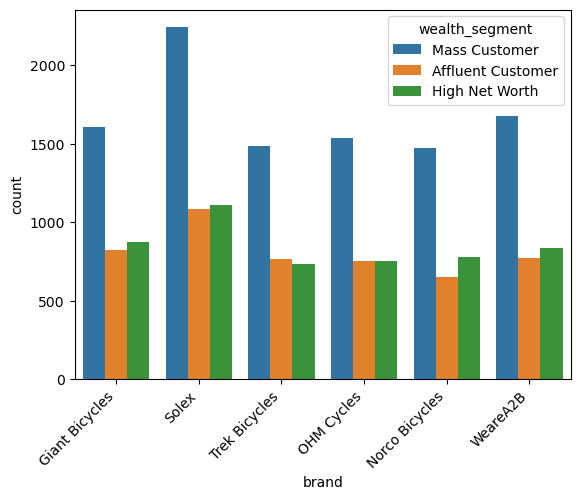

In [149]:
sns.countplot(x='brand', hue='wealth_segment', data=mergetable)
plt.xticks(rotation=45, ha='right')

wealth 和 product line

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard'),
  Text(1, 0, 'Road'),
  Text(2, 0, 'Mountain'),
  Text(3, 0, 'Touring')])

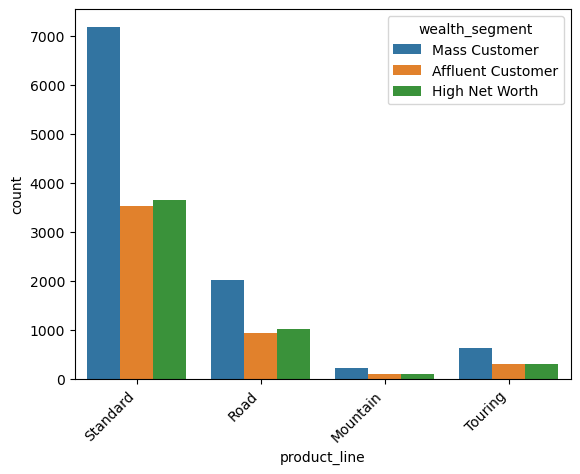

In [150]:
sns.countplot(x='product_line', hue='wealth_segment', data=mergetable)
plt.xticks(rotation=45, ha='right')

有没有车和product line

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard'),
  Text(1, 0, 'Road'),
  Text(2, 0, 'Mountain'),
  Text(3, 0, 'Touring')])

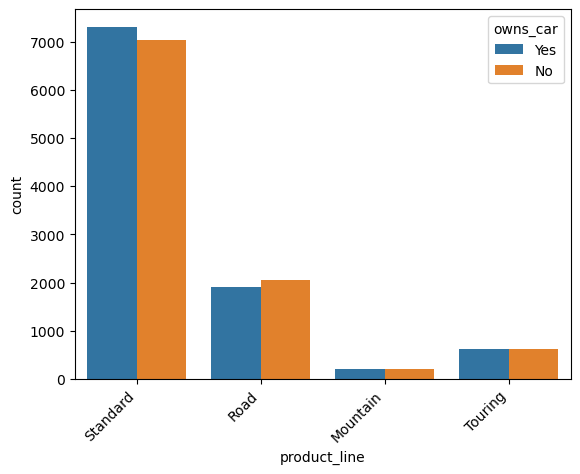

In [151]:
sns.countplot(x='product_line', hue='owns_car', data=mergetable)
plt.xticks(rotation=45, ha='right')

# Stripplot

list_price和wealth

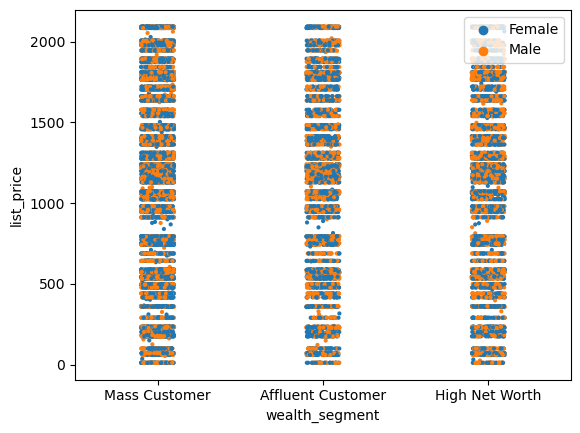

In [152]:
sns.stripplot(x='wealth_segment', y='list_price', hue='gender', data=mergetable, jitter=True,
                      color=None, size=3,
                      edgecolor="gray", linewidth=0)
plt.legend(loc='best')

年龄和product line

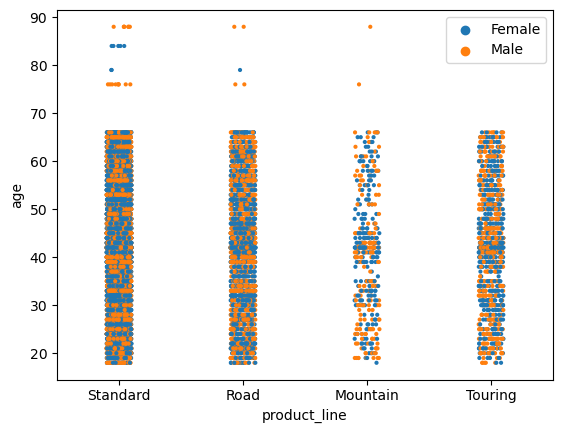

In [153]:
sns.stripplot(x='product_line', y='age', hue='gender', data=mergetable, jitter=True,
                      color=None, size=3,
                      edgecolor="gray", linewidth=0)
plt.legend(loc='best')

past 3 years purchase 和 wealth

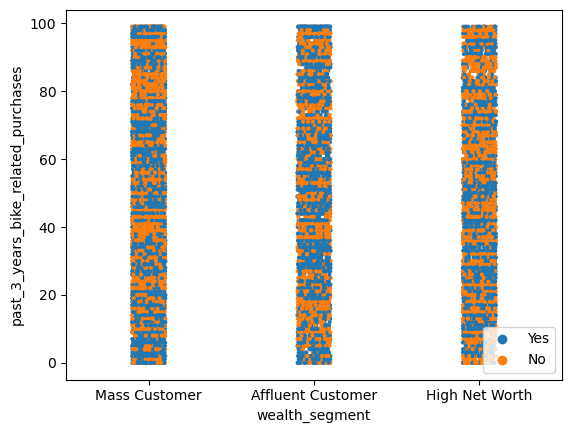

In [154]:
sns.stripplot(x='wealth_segment', y='past_3_years_bike_related_purchases', hue='owns_car', data=mergetable, jitter=True,
                      color=None, size=3,
                      edgecolor="gray", linewidth=0)
plt.legend(loc='best')

# Boxplot

list price 和 wealth

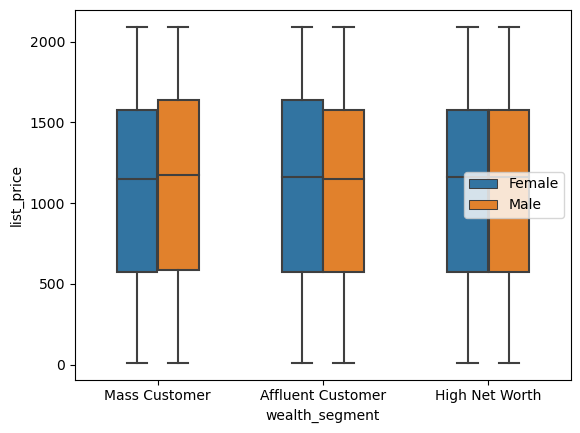

In [155]:
sns.boxplot(x='wealth_segment', y='list_price', hue='gender', data=mergetable, order=None,
                    hue_order=None,
                    color=None,
                    saturation=.75, width=.5, notch=False, ax=None)
plt.legend(loc = 'best')

# relational plot

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


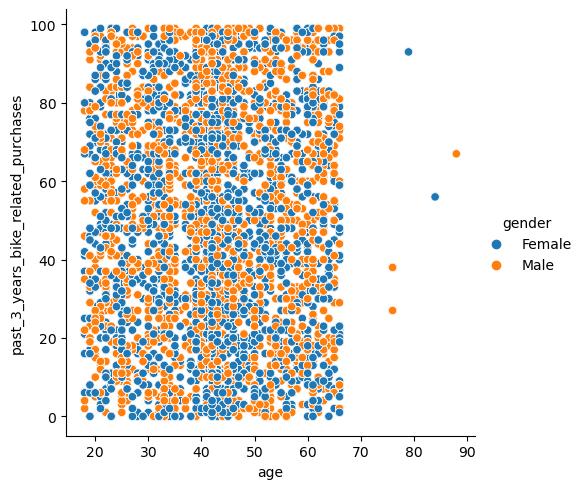

In [156]:
sns.relplot(data=mergetable, x="age", y="past_3_years_bike_related_purchases", hue="gender")
plt.show()

# Assigned the cohorts and calculated the monthly offset

In [157]:
dt.datetime(mergetable['transaction_date'][1].year, mergetable['transaction_date'][1].month, 1)

datetime.datetime(2017, 3, 1, 0, 0)

In [158]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
mergetable['TransactionMonth'] = mergetable['transaction_date'].apply(get_month)
mergetable

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,TransactionMonth
0,14931,31,1,2017-12-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01
10,13424,2,1,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-02-01
8,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01
7,3765,38,1,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-04-01
6,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,19836,40,3500,2017-03-14,True,Approved,OHM Cycles,Standard,high,medium,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-03-01
19957,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,medium,medium,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-04-01
19953,8562,33,3500,2017-08-08,False,Approved,Giant Bicycles,Standard,medium,small,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-08-01
19954,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,...,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-02-01


In [159]:
mergetable.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
4      2017-04-01
5      2017-03-01
6      2017-01-01
          ...    
3496   2017-03-01
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
Name: TransactionMonth, Length: 3488, dtype: datetime64[ns]

In [160]:
mergetable.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-01-01
10      2017-01-01
8       2017-01-01
7       2017-01-01
6       2017-01-01
           ...    
19955   2017-01-01
19957   2017-01-01
19953   2017-01-01
19954   2017-01-01
19958   2017-01-01
Name: TransactionMonth, Length: 19959, dtype: datetime64[ns]

In [161]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
mergetable['CohortMonth'] = mergetable.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
print(mergetable.head())

    transaction_id  product_id  customer_id transaction_date  online_order  \
0            14931          31            1       2017-12-14          True   
10           13424           2            1       2017-02-21         False   
8             5157          47            1       2017-05-11          True   
7             3765          38            1       2017-04-06          True   
6               94          86            1       2017-12-23         False   

   order_status           brand product_line product_class product_size  ...  \
0      Approved  Giant Bicycles     Standard        medium       medium  ...   
10     Approved           Solex     Standard        medium       medium  ...   
8      Approved   Trek Bicycles         Road           low        small  ...   
7      Approved           Solex     Standard        medium       medium  ...   
6      Approved      OHM Cycles     Standard        medium       medium  ...   

    deceased_indicator  owns_car  tenure          

# calculate cohort index

In [162]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(mergetable, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(mergetable, 'CohortMonth')

In [163]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
mergetable['CohortIndex'] = years_diff * 12 + months_diff  + 1
mergetable

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,TransactionMonth,CohortMonth,CohortIndex
0,14931,31,1,2017-12-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01,12
10,13424,2,1,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-02-01,2017-01-01,2
8,5157,47,1,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-05-01,2017-01-01,5
7,3765,38,1,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-04-01,2017-01-01,4
6,94,86,1,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,2017-12-01,2017-01-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,19836,40,3500,2017-03-14,True,Approved,OHM Cycles,Standard,high,medium,...,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-03-01,2017-01-01,3
19957,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,medium,medium,...,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-04-01,2017-01-01,4
19953,8562,33,3500,2017-08-08,False,Approved,Giant Bicycles,Standard,medium,small,...,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-08-01,2017-01-01,8
19954,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,...,No,17.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,2017-02-01,2017-01-01,2


In [164]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = mergetable.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1352
1,2017-01-01,2,486
2,2017-01-01,3,507
3,2017-01-01,4,509
4,2017-01-01,5,501


# Retention metrics

In [165]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1352.0,486.0,507.0,509.0,501.0,483.0,517.0,529.0,499.0,530.0,497.0,516.0
2017-02-01,798.0,324.0,296.0,313.0,286.0,297.0,307.0,279.0,329.0,308.0,296.0,NaN
2017-03-01,483.0,166.0,173.0,167.0,182.0,183.0,172.0,211.0,189.0,180.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,121.0,44.0,43.0,47.0,46.0,45.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.2,39.1,36.9,39.2,36.8,38.2
2017-02-01,100.0,40.6,37.1,39.2,35.8,37.2,38.5,35.0,41.2,38.6,37.1,NaN
2017-03-01,100.0,34.4,35.8,34.6,37.7,37.9,35.6,43.7,39.1,37.3,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.4,35.5,38.8,38.0,37.2,43.8,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


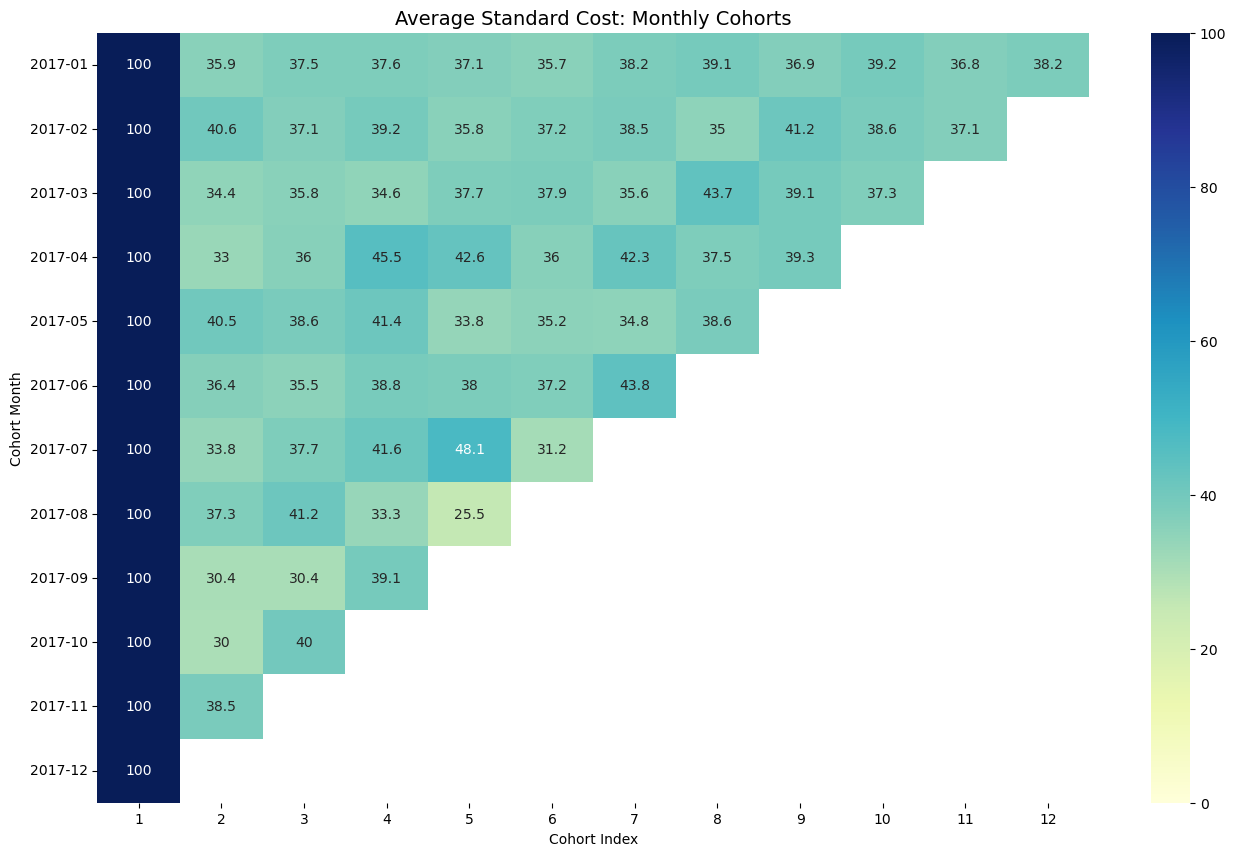

In [167]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation= 'horizontal')
plt.show()

# Root Cause Analysis

In [214]:
df_48 = mergetable[(mergetable['CohortMonth'] == '2017-07-01') & (mergetable['CohortIndex'] == 5)]

In [215]:
df_31 = mergetable[(mergetable['CohortMonth'] == '2017-07-01') & (mergetable['CohortIndex'] == 6)]

In [216]:
df_root = df_48.merge(df_31, how ='left', on = 'customer_id')
df_root

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,owns_car_y,tenure_y,address_y,postcode_y,state_y,country_y,property_valuation_y,TransactionMonth_y,CohortMonth_y,CohortIndex_y
0,19710,93,45,2017-11-17,True,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,10186,87,119,2017-11-30,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,6243,9,188,2017-11-21,False,Approved,Norco Bicycles,Standard,medium,small,...,Yes,13.000000,4179 Carioca Terrace,2220.0,NSW,Australia,11.0,2017-12-01,2017-07-01,6.0
3,6243,9,188,2017-11-21,False,Approved,Norco Bicycles,Standard,medium,small,...,Yes,13.000000,4179 Carioca Terrace,2220.0,NSW,Australia,11.0,2017-12-01,2017-07-01,6.0
4,17493,50,437,2017-11-12,True,Approved,WeareA2B,Standard,medium,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
5,16879,83,581,2017-11-07,True,Approved,Solex,Touring,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
6,5828,69,635,2017-11-20,False,Approved,Giant Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
7,4882,28,635,2017-11-21,False,Approved,Norco Bicycles,Standard,medium,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
8,13989,48,726,2017-11-06,False,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
9,10245,49,899,2017-11-11,True,Approved,Trek Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'WeareA2B'),
  Text(1, 0, 'OHM Cycles'),
  Text(2, 0, 'Norco Bicycles'),
  Text(3, 0, 'Solex'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

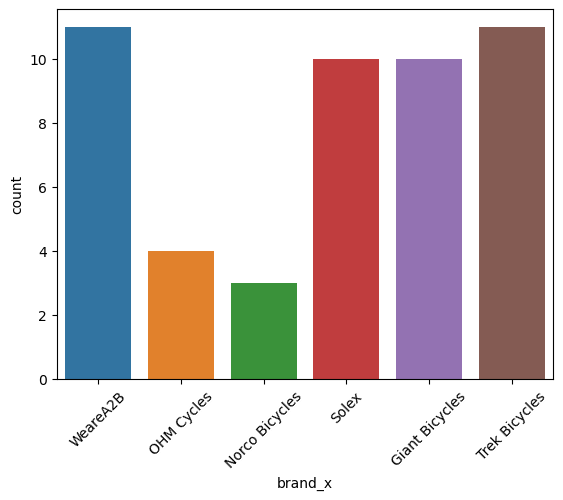

In [218]:
sns.countplot(x='brand_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'OHM Cycles'),
  Text(1, 0, 'WeareA2B'),
  Text(2, 0, 'Norco Bicycles'),
  Text(3, 0, 'Solex'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'Trek Bicycles')])

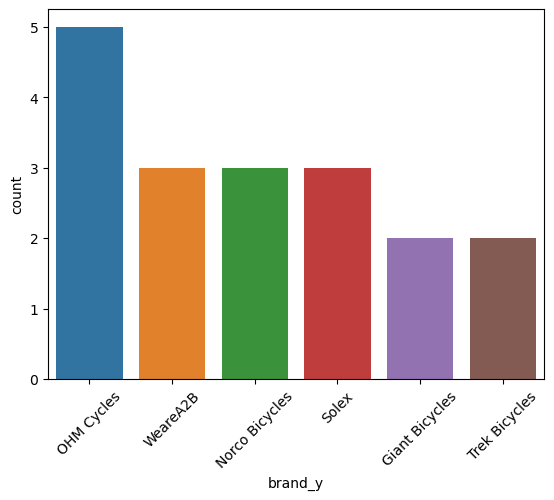

In [219]:
sns.countplot(x='brand_y', data=df_root)
plt.xticks(rotation=45)

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444445, 0.5, 'count')

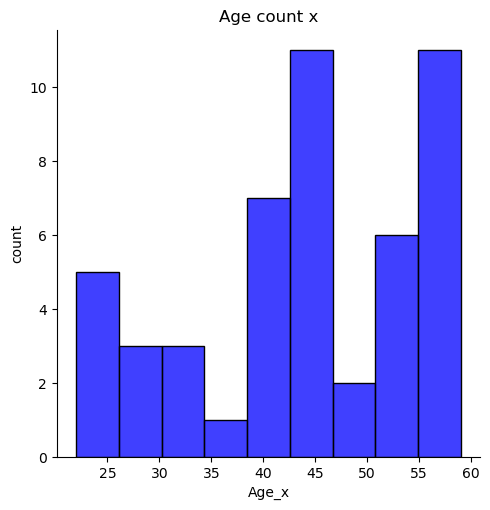

In [222]:
sns.displot(df_root['age_x'], kde=False, bins=9, color='blue', edgecolor='black')
plt.title('Age count x')
plt.xlabel('Age_x')
plt.ylabel('count')

e:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(22.694444444444443, 0.5, 'count')

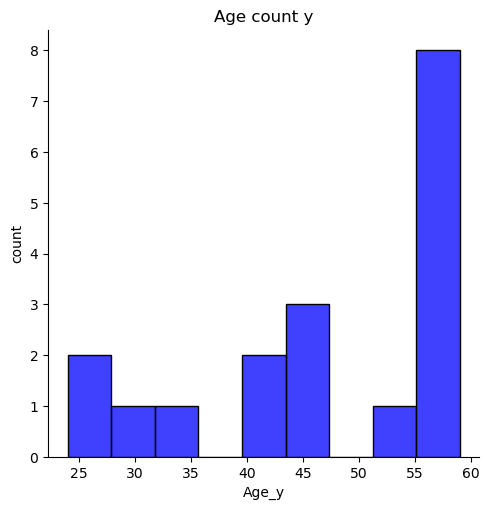

In [223]:
sns.displot(df_root['age_y'], kde=False, bins=9, color='blue', edgecolor='black')
plt.title('Age count y')
plt.xlabel('Age_y')
plt.ylabel('count')

In [ ]:
sns.countplot(x='brand_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Standard'), Text(1, 0, 'Touring'), Text(2, 0, 'Road')])

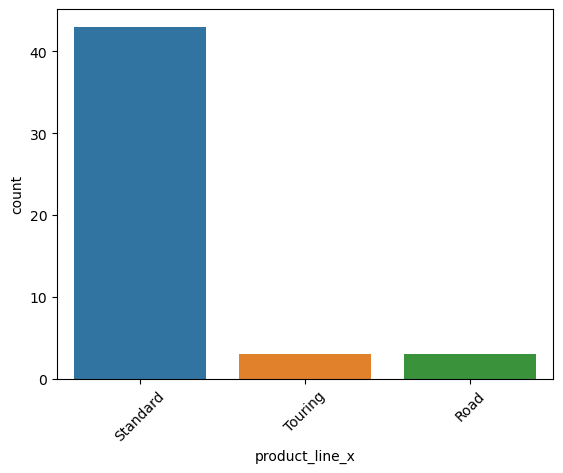

In [224]:
sns.countplot(x='product_line_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Standard'), Text(1, 0, 'Touring'), Text(2, 0, 'Road')])

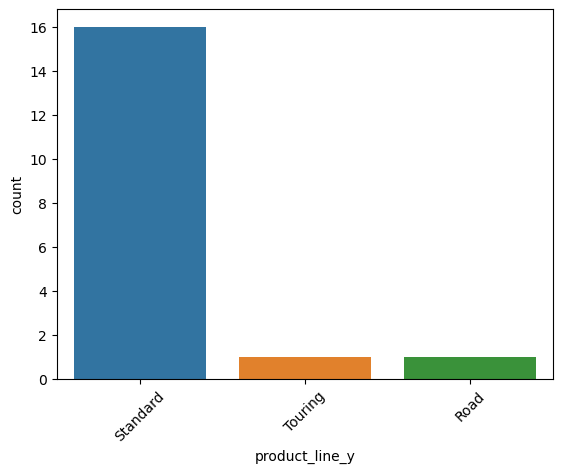

In [225]:
sns.countplot(x='product_line_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'medium'), Text(1, 0, 'small'), Text(2, 0, 'large')])

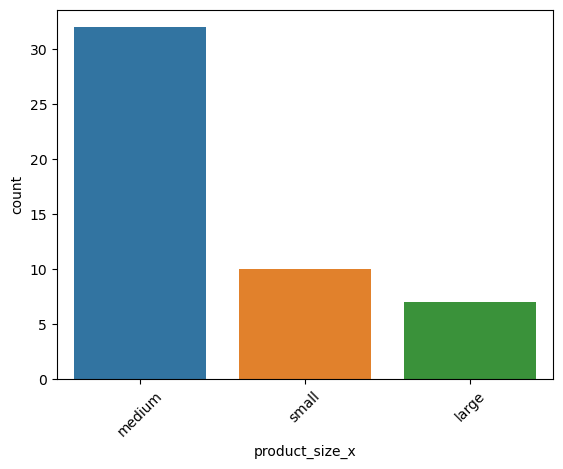

In [228]:
sns.countplot(x='product_size_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'medium'), Text(1, 0, 'large'), Text(2, 0, 'small')])

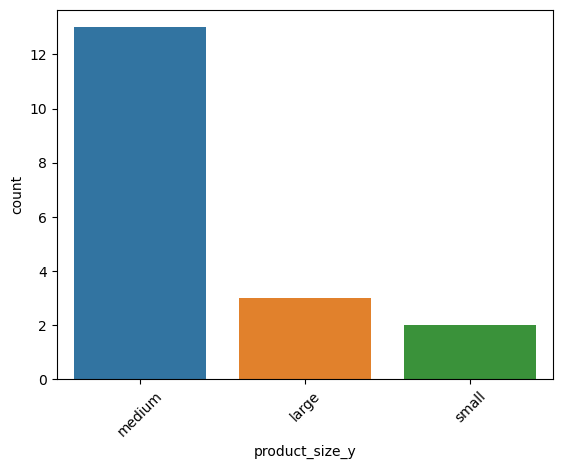

In [229]:
sns.countplot(x='product_size_y', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Affluent Customer')])

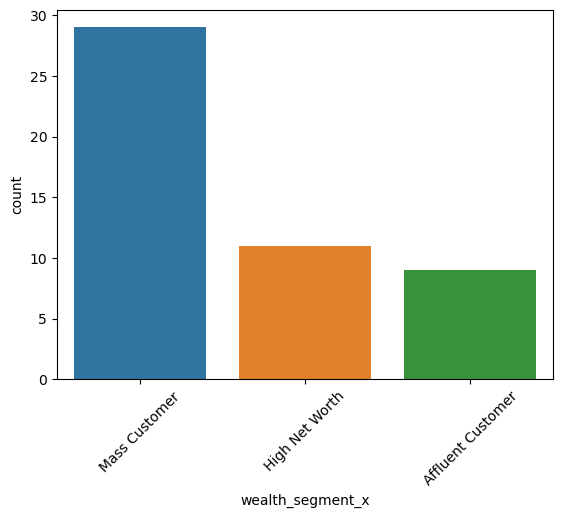

In [231]:
sns.countplot(x='wealth_segment_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Affluent Customer')])

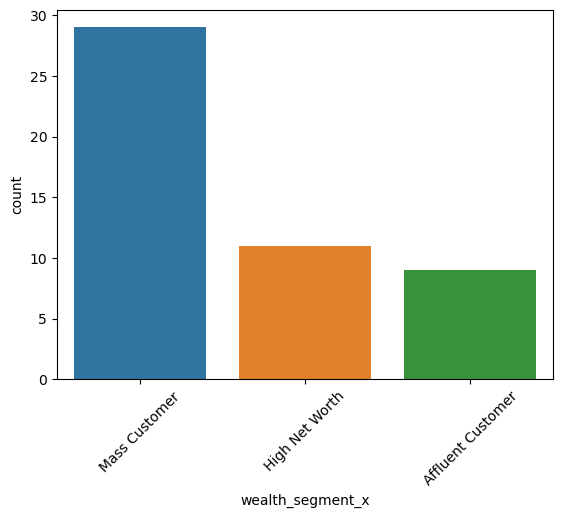

In [232]:
sns.countplot(x='wealth_segment_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

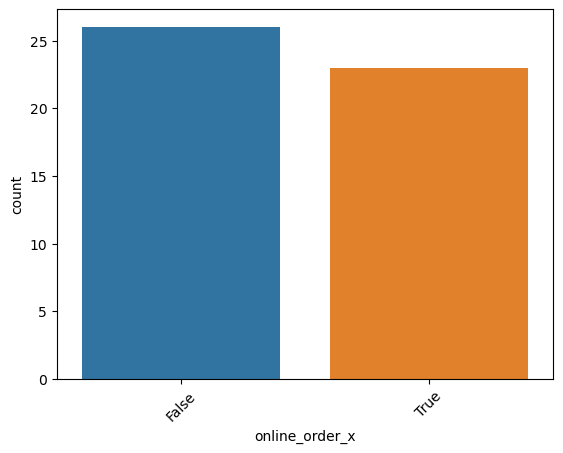

In [233]:
sns.countplot(x='online_order_x', data=df_root)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

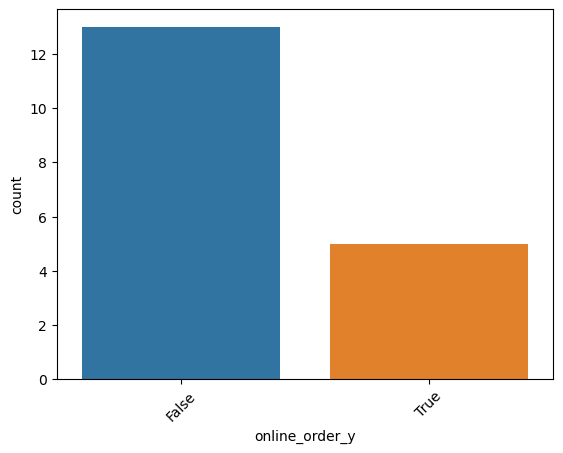

In [234]:
sns.countplot(x='online_order_y', data=df_root)
plt.xticks(rotation=45)

# retention rate 48 的这部分人年龄更集中于中年人40-50， 31的更集中于老年人60岁左右。 48这部分人有车的人比31的更多

# RFM Model

In [235]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,2017-06-01,2017-01-01,6
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,2017-11-01,2017-01-01,11
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,2017-04-01,2017-04-01,1
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,2017-07-01,2017-02-01,6


In [236]:
# Convert transaction_date to datetime format
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

# Define the reference date for recency calculation (assuming the latest date in the dataset)
reference_date = transaction_df['transaction_date'].max()

# Calculate RFM metrics
rfm_df = transaction_df.groupby('customer_id').agg({
    'transaction_date': lambda x: (reference_date - x.max()).days,
    'transaction_id': 'count',
    'list_price': 'sum'
}).rename(columns={
    'transaction_date': 'Recency',
    'transaction_id': 'Frequency',
    'list_price': 'Monetary'
}).reset_index()

# Display the first few rows of the RFM dataframe
rfm_df.head()


,customer_id,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20


In [237]:
# Assign scores to Recency, Frequency, and Monetary using quantiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single RFM score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

rfm_df.head()


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,5,5,5,555
1,2,128,3,4149.07,1,1,2,112
2,3,102,8,9888.23,1,4,5,145
3,4,195,2,1047.72,1,1,1,111
4,5,16,6,5903.20,4,3,3,433


Segment
Least Purchase     993
Others             887
Loyal Customers    744
Big Spenders       741
Best Customers     129
Name: count, dtype: int64


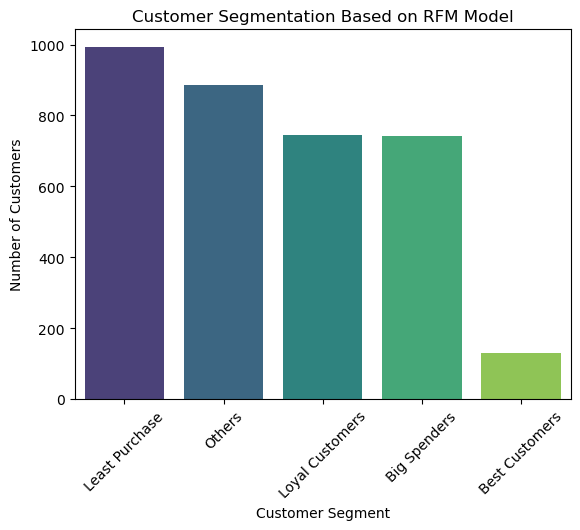

In [242]:
def segment_customer(df):
    if df['RFM_Score'] == '555':
        return 'Best Customers'
    elif df['R_Score'] in [4, 5] and df['F_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif df['M_Score'] in [4, 5]:
        return 'Big Spenders'
    elif df['R_Score'] in [1, 2]:
        return 'Least Purchase'
    else:
        return 'Others'

# Apply the segmentation function again
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Display the count of customers in each segment
segment_counts = rfm_df['Segment'].value_counts()
print(segment_counts)

# Plotting the updated segments
sns.countplot(x='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title('Customer Segmentation Based on RFM Model')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


# bonus = join 3 table -> EDA + missing + cohort_analysis + root cause analysis connecting with customer tables + RFM model + segmentation